In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')

In [2]:
loan_df = pd.read_csv('Loan.csv')
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
loan_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
loan_df.dropna(inplace=True)

In [7]:
loan_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
loan_df.duplicated().sum()

0

In [9]:
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [10]:
loan_df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [11]:
# Convert the 'Gender' column in the loan_df dataframe to a categorical data type
loan_df['Gender'] = loan_df['Gender'].astype('category')

# Convert the categorical 'Gender' column to numeric codes (e.g., Male -> 1, Female -> 0)
loan_df['Gender'] = loan_df['Gender'].cat.codes

# Display the 'Gender' column to verify the conversion
loan_df.Gender

1      1
2      1
3      1
4      1
5      1
      ..
609    0
610    1
611    1
612    1
613    0
Name: Gender, Length: 480, dtype: int8

In [12]:
loan_df['Married'].unique()

array(['Yes', 'No'], dtype=object)

In [13]:
# Convert the 'Married' column in the loan_df dataframe to a categorical data type
loan_df['Married'] = loan_df['Married'].astype('category')

# Convert the categorical 'Married' column to numeric codes (e.g., Yes -> 1, No -> 0)
loan_df['Married'] = loan_df['Married'].cat.codes

# Display the 'Married' column to verify the conversion
loan_df['Married']

1      1
2      1
3      1
4      0
5      1
      ..
609    0
610    1
611    1
612    1
613    0
Name: Married, Length: 480, dtype: int8

In [14]:
loan_df['Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [15]:
loan_df['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [16]:
loan_df['Dependents'] = loan_df['Dependents'].replace({'3+': 4})
# or loan_df.replace({'Dependents': {'3+': 4}}, inplace=True)

In [17]:
loan_df['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

In [18]:
loan_df['Loan_Status'].unique()

array(['N', 'Y'], dtype=object)

In [19]:
loan_df['Loan_Status'].value_counts()

Loan_Status
Y    332
N    148
Name: count, dtype: int64

In [20]:
loan_df['Loan_Status'] = loan_df['Loan_Status'].astype('category')
loan_df['Loan_Status']

1      N
2      Y
3      Y
4      Y
5      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 480, dtype: category
Categories (2, object): ['N', 'Y']

In [21]:
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1,1,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,1,1,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,1,1,4,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,1,1,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,1,1,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


<Axes: xlabel='Married', ylabel='count'>

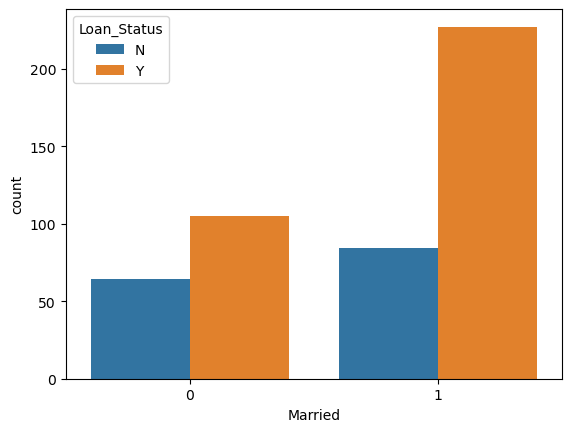

In [22]:
# Create a count plot using seaborn to visualize the count of 'Married' status
# 'x' specifies the categorical variable on the x-axis ('Married')
# 'hue' specifies the categorical variable that will color the bars ('Loan_Status')
# 'data' specifies the dataframe (loan_df) containing the data
sns.countplot(x='Married', hue='Loan_Status', data=loan_df)

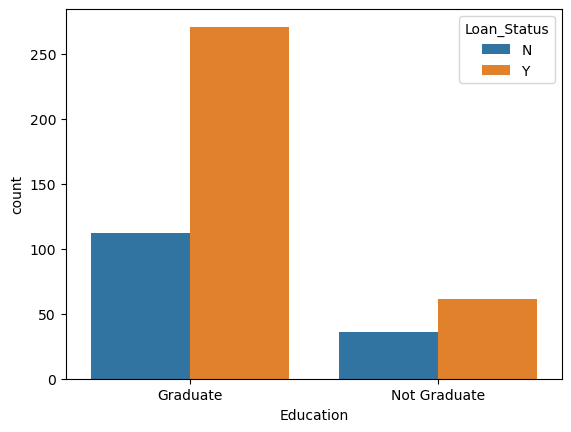

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot using seaborn to visualize the count of 'Education' status
# 'x' specifies the categorical variable on the x-axis ('Education')
# 'hue' specifies the categorical variable that will color the bars ('Loan_Status')
# 'data' specifies the dataframe (loan_df) containing the data
sns.countplot(x='Education', hue='Loan_Status', data=loan_df)

# Show the plot
plt.show()


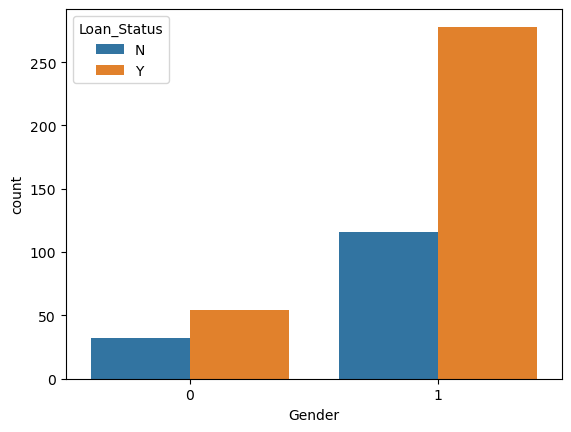

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot using seaborn to visualize the count of 'Gender'
# 'x' specifies the categorical variable on the x-axis ('Gender')
# 'hue' specifies the categorical variable that will color the bars ('Loan_Status')
# 'data' specifies the dataframe (loan_df) containing the data
sns.countplot(x='Gender', hue='Loan_Status', data=loan_df)

# Show the plot
plt.show()


In [25]:
# Convert the categorical 'Loan_Status' column in the loan_df dataframe to numeric codes
# This will map each category to a unique integer code
loan_df['Loan_Status'] = loan_df['Loan_Status'].cat.codes

In [26]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    int8   
 2   Married            480 non-null    int8   
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    int8   
dtypes: float64(4), int64(1), int8(3), object(5)
memory usage: 42.7+ KB


In [27]:
loan_df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [28]:
loan_df['Education'].value_counts()

Education
Graduate        383
Not Graduate     97
Name: count, dtype: int64

In [29]:
loan_df['Education'] = loan_df['Education'].astype('category')
loan_df['Education'] = loan_df['Education'].cat.codes
loan_df['Education']

1      0
2      0
3      1
4      0
5      0
      ..
609    0
610    0
611    0
612    0
613    0
Name: Education, Length: 480, dtype: int8

In [30]:
loan_df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [31]:
loan_df['Self_Employed'].value_counts()

Self_Employed
No     414
Yes     66
Name: count, dtype: int64

In [32]:
loan_df['Self_Employed'] = loan_df['Self_Employed'].astype('category')
loan_df['Self_Employed'] = loan_df['Self_Employed'].cat.codes
loan_df['Self_Employed']

1      0
2      1
3      0
4      0
5      1
      ..
609    0
610    0
611    0
612    0
613    1
Name: Self_Employed, Length: 480, dtype: int8

In [33]:
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,1,1,4,0,0,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,Urban,1


In [34]:
# Calculate for the total income
loan_df['TotalIncome'] = loan_df['ApplicantIncome'] + loan_df['CoapplicantIncome']
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,Urban,1,9613.0


In [35]:
loan_df['Property_Area'] = loan_df['Property_Area'].astype('category')
loan_df['Property_Area'] = loan_df['Property_Area'].cat.codes
loan_df['Property_Area']

1      0
2      2
3      2
4      2
5      2
      ..
609    0
610    0
611    2
612    2
613    1
Name: Property_Area, Length: 480, dtype: int8

In [36]:
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,3000.0
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1,9613.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1,2900.0
610,LP002979,1,1,4,0,0,4106,0.0,40.0,180.0,1.0,0,1,4106.0
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1,8312.0
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1,7583.0


In [37]:
loan_df.drop(columns=['Loan_ID','ApplicantIncome','CoapplicantIncome'],inplace=True)

In [38]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            480 non-null    int8   
 1   Married           480 non-null    int8   
 2   Dependents        480 non-null    object 
 3   Education         480 non-null    int8   
 4   Self_Employed     480 non-null    int8   
 5   LoanAmount        480 non-null    float64
 6   Loan_Amount_Term  480 non-null    float64
 7   Credit_History    480 non-null    float64
 8   Property_Area     480 non-null    int8   
 9   Loan_Status       480 non-null    int8   
 10  TotalIncome       480 non-null    float64
dtypes: float64(4), int8(6), object(1)
memory usage: 25.3+ KB


In [39]:
X = loan_df.drop(columns=['Loan_Status'],axis=1)
X

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
1,1,1,1,0,0,128.0,360.0,1.0,0,6091.0
2,1,1,0,0,1,66.0,360.0,1.0,2,3000.0
3,1,1,0,1,0,120.0,360.0,1.0,2,4941.0
4,1,0,0,0,0,141.0,360.0,1.0,2,6000.0
5,1,1,2,0,1,267.0,360.0,1.0,2,9613.0
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,71.0,360.0,1.0,0,2900.0
610,1,1,4,0,0,40.0,180.0,1.0,0,4106.0
611,1,1,1,0,0,253.0,360.0,1.0,2,8312.0
612,1,1,2,0,0,187.0,360.0,1.0,2,7583.0


In [40]:
y = loan_df['Loan_Status']
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int8

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2,test_size=0.2)

In [42]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [43]:
y_pred = logistic_model.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1], dtype=int8)

In [44]:
# accuracy score on training data
X_train_prediction = logistic_model.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,y_train)
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.8151041666666666


In [45]:
# accuracy score on training data
X_test_prediction = logistic_model.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,y_test)
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.7708333333333334


In [46]:
# Using SVM Classifier
from sklearn.svm import SVC
classifier = SVC(kernel='linear')
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [47]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,y_train)
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.7369791666666666


In [48]:
# accuracy score on testing data
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,y_test)
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.6666666666666666
